**Exercise 5.1**

Suppose that the same randomly selected person as in Table 5.4 gets re-tested after the first test result was positive, and on the re-test, the result is negative. When taking into account the results of both tests, what is the probability that the person has the disease?

In [28]:
library(dplyr)

# Make Table 5.4
make_prob_table <- function(p.disease) {
    prob.table <- data.frame(test = c(TRUE, FALSE),
                             has.disease = c(0.99 * p.disease, (1 - 0.99) * p.disease),
                             no.disease = c(0.05 * (1 - p.disease), (1 - 0.05) * (1 - p.disease)))
    return(prob.table)
}

# Model taking the test and return the probability of having the disease
update_prior <- function(p.disease, test.result = TRUE) {
    # Make Table 5.4
    prob.table <- make_prob_table(p.disease)
    
    # Select the row that corresponds to the test result and compute the posterior
    result <- filter(prob.table, test == test.result) %>% select(-test)
    posterior <- result$has.disease / sum(result)
    
    return(posterior)
}

# Take the test the first time - it was positive, oh no
has.disease <- update_prior(p.disease = 0.001, test.result = TRUE)
print(paste('After the first test, probability of having the disease is: ', has.disease))
has.disease <- update_prior(p.disease = has.disease, test.result = FALSE)
print(paste('After the second test, probability of having the disease is: ', has.disease))

[1] "After the first test, probability of having the disease is:  0.019434628975265"
[1] "After the second test, probability of having the disease is:  0.000208586165048544"


**Exercise 5.2**

(A) Suppose that the population consists of 100,000 people. Compute how many people would be expected to fall into each cell of Table 5.4.

In [31]:
# We just multiply each cell in the table by the number of people
tbl <- make_prob_table(p.disease = 0.001) %>%
        mutate(has.disease = has.disease * 100000,
               no.disease = no.disease * 100000)

tbl

test,has.disease,no.disease
TRUE,99,4995
FALSE,1,94905


(B) Return these to probabilities.

This is just the original table.

**Exercise 5.3**

(A) Suppose that a person selected at random from the population gets the test and it comes back negative. Compute the probability that the person has the disease.

In [33]:
has.disease <- update_prior(p.disease = 0.001, test.result = FALSE)
print(paste('After the first test, probability of having the disease is: ', has.disease))

[1] "After the first test, probability of having the disease is:  1.05367416180221e-05"


(B) The person then gets re-tested, and on the second test the result is positive. Compute the probability that the person has the disease.

In [34]:
has.disease <- update_prior(p.disease = has.disease, test.result = TRUE)
print(paste('After the first test, probability of having the disease is: ', has.disease))

[1] "After the first test, probability of having the disease is:  0.000208586165048544"


**Exercise 5.4**

Play around with the ```BernGrid``` script.


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



Loading required package: coda


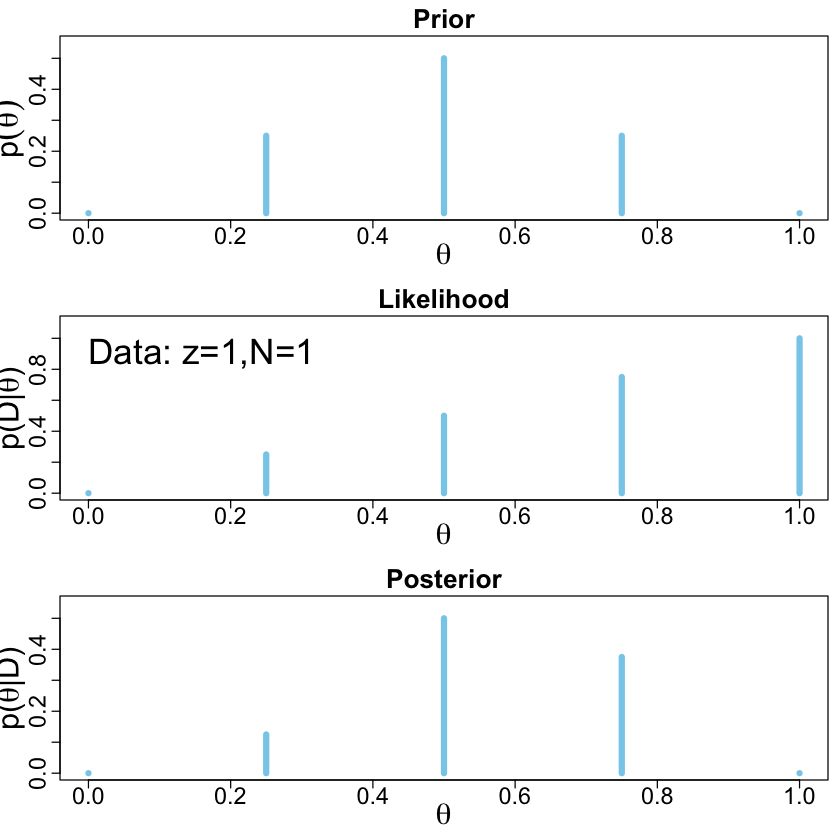

In [37]:
source('book_scripts/DBDA2E-utilities.R')
source('book_scripts/BernGrid.R')

Theta = seq( 0 , 1 , length=5 )  # Sparse teeth for Theta.
pTheta = pmin( Theta , 1-Theta ) # Triangular shape for pTheta.
pTheta = pTheta/sum(pTheta)      # Make pTheta sum to 1.0
Data = c(rep(0,0),rep(1,1))      # Single flip with 1 head

openGraph(width=5,height=7)
posterior = BernGrid( Theta, pTheta , Data , plotType="Bars" , 
                      showCentTend="None" , showHDI=FALSE , showpD=FALSE )